In [33]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

plt.style.use('seaborn-whitegrid') # Gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (10, 6) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 100 # resolución gráficos

In [34]:
df = pd.read_csv('datasets/qog_std_cs_jan18.csv')
df.head()

,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relacc,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust
0,4,Afghanistan,AFG,700.0,4.0,QoGStdCSJan18,NaN,NaN,29.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,Albania,ALB,339.0,8.0,QoGStdCSJan18,NaN,NaN,26.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,Algeria,DZA,615.0,12.0,QoGStdCSJan18,NaN,NaN,21.0,6.0,...,3.710616,1.704692,3.681347,5.988125,6.301029,5.339371,3.805579,-0.409807,-0.498164,0.179286
3,20,Andorra,AND,232.0,20.0,QoGStdCSJan18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,Angola,AGO,540.0,24.0,QoGStdCSJan18,NaN,NaN,22.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Columns: 1882 entries, ccode to wvs_trust
dtypes: float64(1855), int64(22), object(5)
memory usage: 2.8+ MB


In [36]:
df.shape

(194, 1882)

In [37]:
df['region_record'] = df['ht_region'].replace([1,2,3,4,5,6,7,8,9,10], 
                                                            ['EastEurope', 'LatAm', 'NorthAfrica', 'SudSaharian', 
                                                            'WesternDem', 'EastAsia', 'SouthEastAsia', 'SoutAsia', 
                                                            'Pacific', 'Caribbean'])
df.head()

,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust,region_record
0,4,Afghanistan,AFG,700.0,4.0,QoGStdCSJan18,NaN,NaN,29.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SoutAsia
1,8,Albania,ALB,339.0,8.0,QoGStdCSJan18,NaN,NaN,26.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EastEurope
2,12,Algeria,DZA,615.0,12.0,QoGStdCSJan18,NaN,NaN,21.0,6.0,...,1.704692,3.681347,5.988125,6.301029,5.339371,3.805579,-0.409807,-0.498164,0.179286,NorthAfrica
3,20,Andorra,AND,232.0,20.0,QoGStdCSJan18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WesternDem
4,24,Angola,AGO,540.0,24.0,QoGStdCSJan18,NaN,NaN,22.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SudSaharian


In [38]:
subsample_am = df.sample(frac=.5, random_state=5866)
subsample_nz = df.sample(frac=.5, random_state=5866)

subsample_am = subsample_am.loc[:, ['cname', 'ccodealp','ht_region','gle_cgdpc', 'undp_hdi','imf_pop', 
                                    'ffp_hf', 'wef_qes','wdi_expedu','wdi_ners']]

subsample_nz = subsample_nz.loc[:, ['cname', 'ccodealp','ht_region','gle_cgdpc', 'undp_hdi',
                                    'imf_pop', 'wef_imort','who_alc2000', 'who_tobt', 'wdi_exph']]




In [39]:
def fetch_descriptives(dataframe):
    for key, value in dataframe.iteritems():
        print(value.describe())


In [40]:
fetch_descriptives(subsample_am)


count          97
unique         97
top       Lesotho
freq            1
Name: cname, dtype: object
count      97
unique     97
top       LSO
freq        1
Name: ccodealp, dtype: object
count    97.000000
mean      4.639175
std       2.566554
min       1.000000
25%       3.000000
50%       4.000000
75%       6.000000
max      10.000000
Name: ht_region, dtype: float64
count        96.000000
mean      13607.988716
std       16336.002729
min         332.269990
25%        2451.077575
50%        7315.120100
75%       19903.556500
max      104049.440000
Name: gle_cgdpc, dtype: float64
count    92.000000
mean      0.690228
std       0.153510
min       0.347000
25%       0.557250
50%       0.721000
75%       0.808750
max       0.937000
Name: undp_hdi, dtype: float64
count     73.000000
mean      28.403411
std       51.533461
min        0.011000
25%        1.354000
50%        8.544000
75%       30.709000
max      318.789001
Name: imf_pop, dtype: float64
count    88.000000
mean      5.529545
std 

In [41]:
fetch_descriptives(subsample_nz)

count          97
unique         97
top       Lesotho
freq            1
Name: cname, dtype: object
count      97
unique     97
top       LSO
freq        1
Name: ccodealp, dtype: object
count    97.000000
mean      4.639175
std       2.566554
min       1.000000
25%       3.000000
50%       4.000000
75%       6.000000
max      10.000000
Name: ht_region, dtype: float64
count        96.000000
mean      13607.988716
std       16336.002729
min         332.269990
25%        2451.077575
50%        7315.120100
75%       19903.556500
max      104049.440000
Name: gle_cgdpc, dtype: float64
count    92.000000
mean      0.690228
std       0.153510
min       0.347000
25%       0.557250
50%       0.721000
75%       0.808750
max       0.937000
Name: undp_hdi, dtype: float64
count     73.000000
mean      28.403411
std       51.533461
min        0.011000
25%        1.354000
50%        8.544000
75%       30.709000
max      318.789001
Name: imf_pop, dtype: float64
count    77.000000
mean     23.639410
std 

In [42]:
def fetch_null_cases(dataframe, var, print_list=False):
    tmp = dataframe
    tmp['flagnull'] = tmp[var].isnull()
    count_na = 0
    for i, r in tmp.iterrows():
        if r['flagnull'] is True:
            count_na += 1
            if print_list is True:
                print( r['cname'])
                
    print(f'''
    Casos perdidos para {var}
    Cantidad de Casos: {count_na}
    Porcentaje de la muestra {count_na/len(tmp)}''')

    if print_list is True:
        print(f'Países sin registros de {var}')

In [43]:
for i in subsample_am.columns:
    fetch_null_cases(subsample_am, i, print_list=False)


    Casos perdidos para cname
    Cantidad de Casos: 0
    Porcentaje de la muestra 0.0

    Casos perdidos para ccodealp
    Cantidad de Casos: 0
    Porcentaje de la muestra 0.0

    Casos perdidos para ht_region
    Cantidad de Casos: 0
    Porcentaje de la muestra 0.0

    Casos perdidos para gle_cgdpc
    Cantidad de Casos: 1
    Porcentaje de la muestra 0.010309278350515464

    Casos perdidos para undp_hdi
    Cantidad de Casos: 5
    Porcentaje de la muestra 0.05154639175257732

    Casos perdidos para imf_pop
    Cantidad de Casos: 24
    Porcentaje de la muestra 0.24742268041237114

    Casos perdidos para ffp_hf
    Cantidad de Casos: 9
    Porcentaje de la muestra 0.09278350515463918

    Casos perdidos para wef_qes
    Cantidad de Casos: 20
    Porcentaje de la muestra 0.20618556701030927

    Casos perdidos para wdi_expedu
    Cantidad de Casos: 31
    Porcentaje de la muestra 0.31958762886597936

    Casos perdidos para wdi_ners
    Cantidad de Casos: 33
    Porcentaje 

In [44]:
for i in ['wdi_ners', 'wdi_expedu', 'wef_qes']:
    fetch_null_cases(subsample_am, i, print_list=True)


Andorra
South Sudan
Algeria
Solomon Islands
Germany
Angola
Iraq
Uganda
San Marino
Senegal
Tanzania
Nicaragua
Chad
United Arab Emirates
Togo
Papua New Guinea
Macedonia
Bahamas
Taiwan
Equatorial Guinea
Trinidad and Tobago
Libya
Vietnam
Austria
Canada
Tunisia
Gambia
Maldives
Cambodia
Azerbaijan
Montenegro
South Africa
Zambia

    Casos perdidos para wdi_ners
    Cantidad de Casos: 33
    Porcentaje de la muestra 0.3402061855670103
Países sin registros de wdi_ners
Lesotho
Philippines
Algeria
Solomon Islands
Uzbekistan
Jordan
Angola
Iraq
Yemen
Venezuela
Nicaragua
Nauru
Dominica
Suriname
Dominican Republic
United Arab Emirates
Grenada
Papua New Guinea
Macedonia
Bahamas
Taiwan
Equatorial Guinea
Trinidad and Tobago
Libya
Tuvalu
Eritrea
Marshall Islands
Palau
Montenegro
Zambia
Syria

    Casos perdidos para wdi_expedu
    Cantidad de Casos: 31
    Porcentaje de la muestra 0.31958762886597936
Países sin registros de wdi_expedu
Andorra
South Sudan
Solomon Islands
Uzbekistan
Iraq
San Marino
Nauru


In [45]:
for i in subsample_nz.columns:
    fetch_null_cases(subsample_nz, i, print_list=False)



    Casos perdidos para cname
    Cantidad de Casos: 0
    Porcentaje de la muestra 0.0

    Casos perdidos para ccodealp
    Cantidad de Casos: 0
    Porcentaje de la muestra 0.0

    Casos perdidos para ht_region
    Cantidad de Casos: 0
    Porcentaje de la muestra 0.0

    Casos perdidos para gle_cgdpc
    Cantidad de Casos: 1
    Porcentaje de la muestra 0.010309278350515464

    Casos perdidos para undp_hdi
    Cantidad de Casos: 5
    Porcentaje de la muestra 0.05154639175257732

    Casos perdidos para imf_pop
    Cantidad de Casos: 24
    Porcentaje de la muestra 0.24742268041237114

    Casos perdidos para wef_imort
    Cantidad de Casos: 20
    Porcentaje de la muestra 0.20618556701030927

    Casos perdidos para who_alc2000
    Cantidad de Casos: 7
    Porcentaje de la muestra 0.07216494845360824

    Casos perdidos para who_tobt
    Cantidad de Casos: 42
    Porcentaje de la muestra 0.4329896907216495

    Casos perdidos para wdi_exph
    Cantidad de Casos: 1
    Porcenta

In [46]:
for i in ['who_tobt', 'wef_imort', 'imf_pop']:
    fetch_null_cases(subsample_nz, i, print_list=True)

South Sudan
Algeria
Solomon Islands
Belize
Bhutan
Angola
Qatar
Iraq
San Marino
Yemen
Venezuela
Nicaragua
Chad
Dominica
Zimbabwe
Suriname
United Arab Emirates
Grenada
Timor-Leste
Togo
Sao Tome and Principe
Madagascar
Papua New Guinea
Bolivia
Macedonia
Bahamas
Taiwan
Equatorial Guinea
Trinidad and Tobago
Libya
Tuvalu
Austria
Eritrea
Central African Republic
Marshall Islands
Palau
Tunisia
El Salvador
Gambia
Maldives
Montenegro
Syria

    Casos perdidos para who_tobt
    Cantidad de Casos: 42
    Porcentaje de la muestra 0.4329896907216495
Países sin registros de who_tobt
Andorra
South Sudan
Solomon Islands
Uzbekistan
Iraq
San Marino
Nauru
Dominica
Grenada
Togo
Sao Tome and Principe
Papua New Guinea
Bahamas
Equatorial Guinea
Tuvalu
Eritrea
Central African Republic
Marshall Islands
Palau
Maldives

    Casos perdidos para wef_imort
    Cantidad de Casos: 20
    Porcentaje de la muestra 0.20618556701030927
Países sin registros de wef_imort
Lesotho
Andorra
South Sudan
Senegal
Yemen
Honduras
Ve

In [47]:
def plot_hist(sample_df, full_df, var, sample_mean=False, true_mean=False):
    tmp = sample_df[var].dropna()
    plt.hist(tmp, color='grey', alpha=.4)
    plt.title(var)
    if sample_mean is True:
        plt.axvline(np.mean(tmp), color='dodgerblue')
    if true_mean is True:
        plt.axvline(np.mean(full_df[var]), color='tomato')


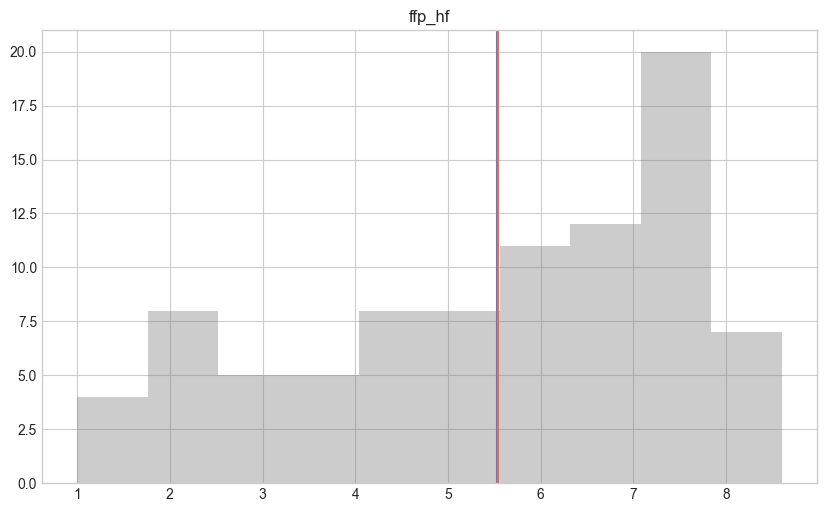

In [48]:
plot_hist(subsample_am, df, 'ffp_hf', sample_mean=True, true_mean=True)

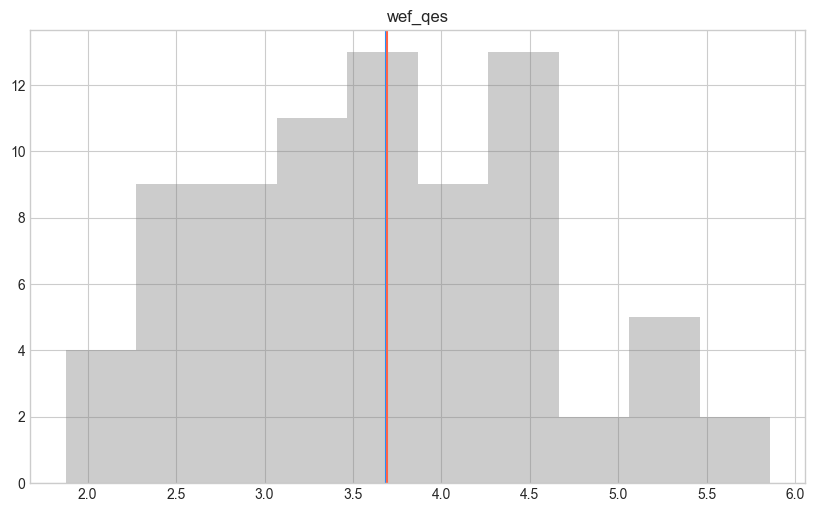

In [49]:
plot_hist(subsample_am, df, 'wef_qes', sample_mean=True, true_mean=True)


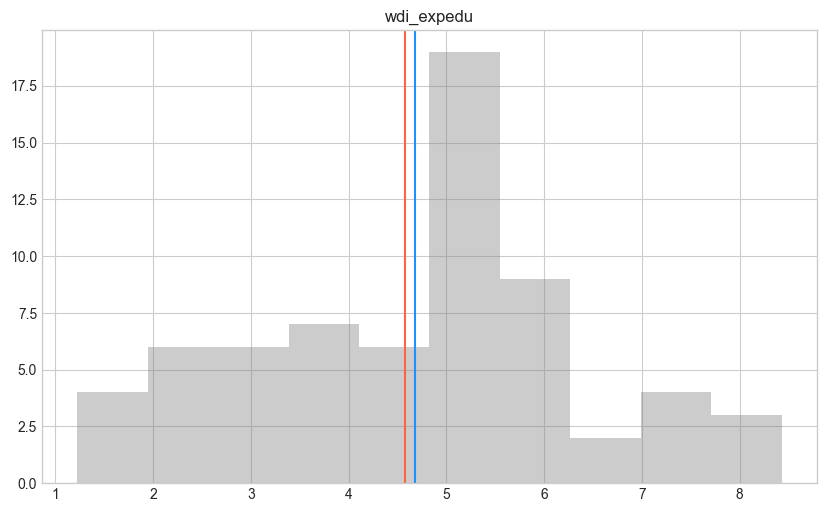

In [50]:
plot_hist(subsample_am, df, 'wdi_expedu', sample_mean=True, true_mean=True)


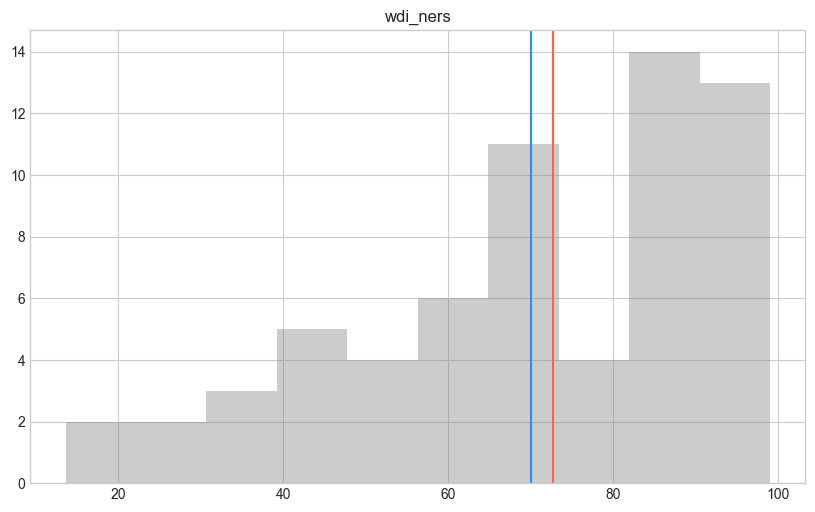

In [51]:
plot_hist(subsample_am, df, 'wdi_ners', sample_mean=True, true_mean=True)

In [52]:
def dotplot(df, plot_var, plot_by, global_stat = False, statistic = 'mean'):
    tmp_df = df.loc[:, [plot_by, plot_var]]
    if statistic is 'mean':
        tmp_group_stat = tmp_df.groupby(plot_by)[plot_var].mean()
    if statistic is 'median':
        tmp_group_stat = tmp_df.groupby(plot_by)[plot_var].median()
    plt.plot(tmp_group_stat.values, tmp_group_stat.index, 'o', color='grey')

    if global_stat is True and statistic is 'mean':
        plt.axvline(df[plot_var].mean(), color='tomato', linestyle='--')
    if global_stat is True and statistic is 'median':
        plt.axvline(df[plot_var].median(), color='tomato', linestyle='--')


<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\dmard\AppData\Local\Temp\ipykernel_1548\952834340.py:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if statistic is 'mean':
C:\Users\dmard\AppData\Local\Temp\ipykernel_1548\952834340.py:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if statistic is 'median':
C:\Users\dmard\AppData\Local\Temp\ipykernel_1548\952834340.py:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if global_stat is True and statistic is 'mean':
C:\Users\dmard\AppData\Local\Temp\ipykernel_15

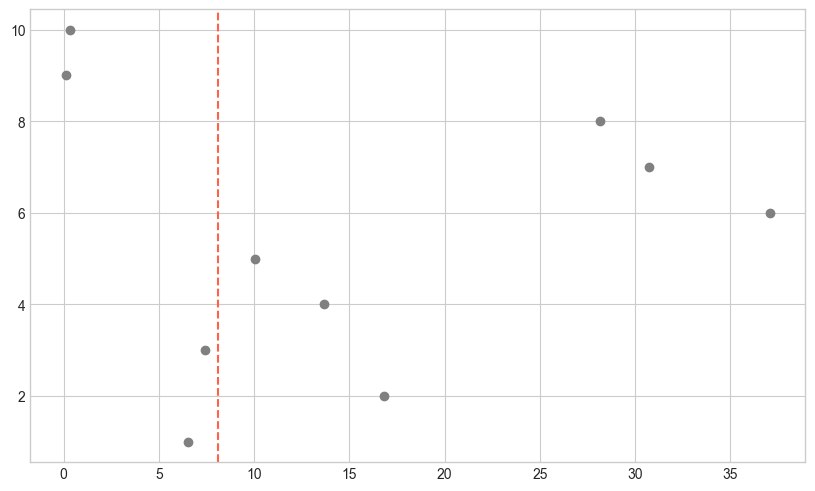

In [53]:
dotplot(df, plot_var='imf_pop', plot_by='ht_region', global_stat=True, statistic='median')

In [54]:
subsample_am.to_csv("datasets/saved/subsample_am_demo.csv", na_rep='NaN')
subsample_nz.to_csv("datasets/saved/subsample_nz_demo.csv", na_rep='NaN')

In [55]:
df_def_1 = pd.read_csv('datasets/saved/subsample_am_demo.csv')
df_def_1.head()

,Unnamed: 0,cname,ccodealp,ht_region,gle_cgdpc,undp_hdi,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,flagnull
0,95,Lesotho,LSO,4,1539.7900,0.495,NaN,7.4,4.053547,NaN,35.212650,False
1,3,Andorra,AND,5,32367.3300,0.857,NaN,NaN,NaN,2.99781,NaN,True
2,104,Malaysia (1966-),MYS,7,12284.2700,0.787,30.709000,4.5,5.258416,5.19593,67.997719,False
3,20,Brazil,BRA,2,9815.2402,0.754,202.768997,4.1,2.720419,5.99395,82.829079,False
4,163,South Sudan,SSD,4,NaN,0.421,NaN,6.9,NaN,1.71297,NaN,True


In [56]:
df_def_2 = pd.read_csv('datasets/saved/subsample_nz_demo.csv')
df_def_2.head()

,Unnamed: 0,cname,ccodealp,ht_region,gle_cgdpc,undp_hdi,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,flagnull
0,95,Lesotho,LSO,4,1539.7900,0.495,NaN,74.199997,2.390000,25.400000,10.617677,True
1,3,Andorra,AND,5,32367.3300,0.857,NaN,NaN,9.979999,33.099998,8.127135,True
2,104,Malaysia (1966-),MYS,7,12284.2700,0.787,30.709000,7.300000,0.520000,22.299999,4.169078,False
3,20,Brazil,BRA,2,9815.2402,0.754,202.768997,12.900000,7.320000,16.100000,8.322834,False
4,163,South Sudan,SSD,4,NaN,0.421,NaN,NaN,NaN,NaN,2.738421,True


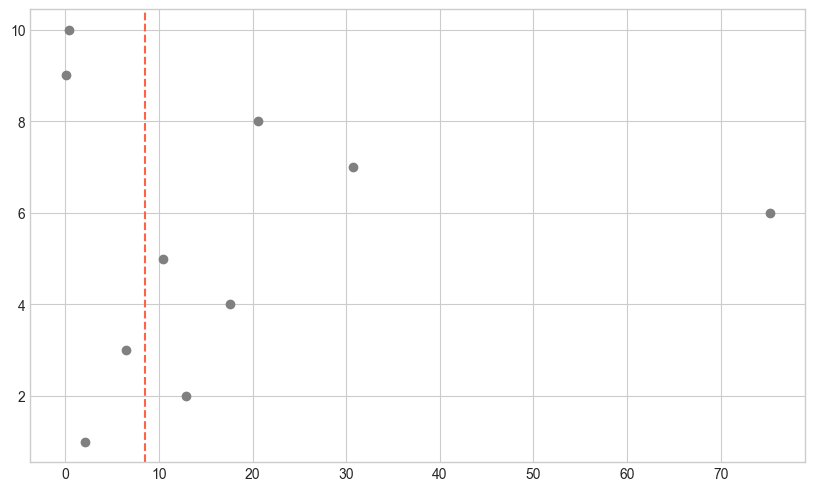

In [57]:
dotplot(df_def_1, plot_var='imf_pop', plot_by='ht_region', global_stat=True, statistic='median')

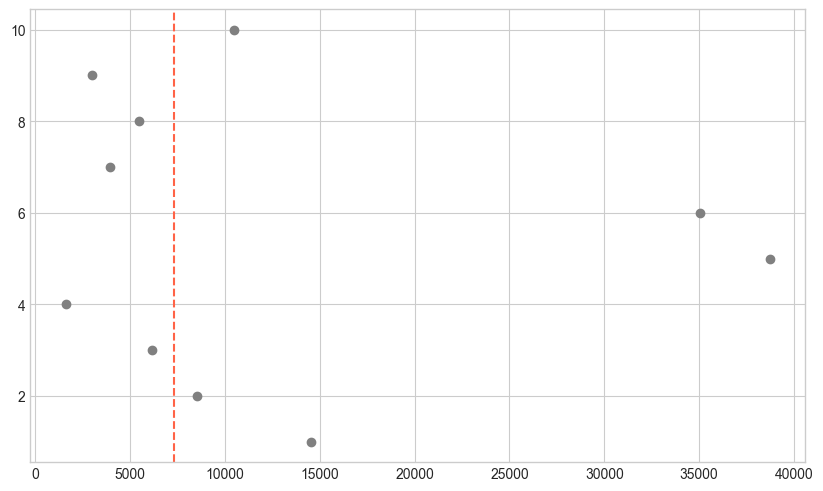

In [58]:
dotplot(df_def_2, plot_var='gle_cgdpc', plot_by='ht_region', global_stat=True, statistic='median')

c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


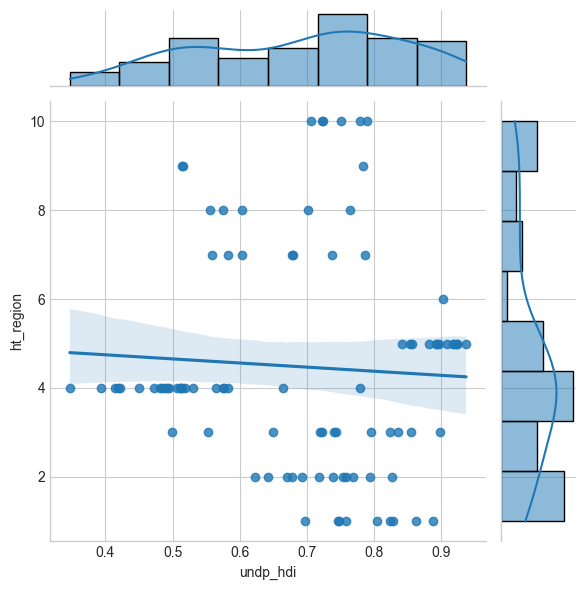

In [63]:
sns.jointplot(df_def_2['undp_hdi'], df_def_2['ht_region'], kind = 'reg')

c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


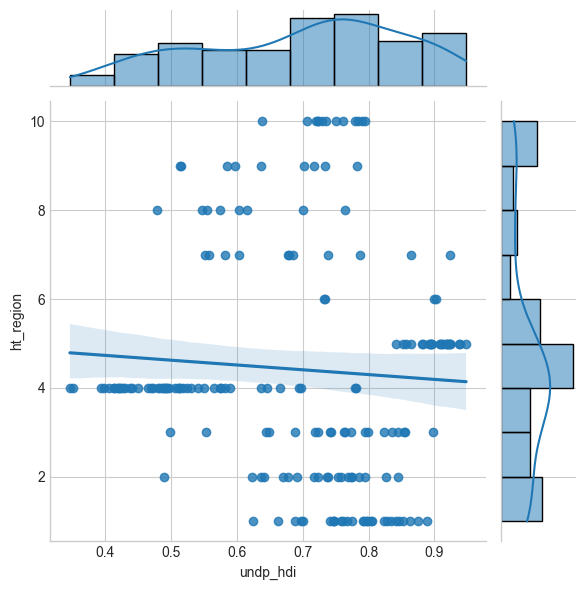

In [64]:
sns.jointplot(df['undp_hdi'], df['ht_region'], kind = 'reg')